# Classify the data shown in the Fashion MNIST data


* Do this using the best practices discussed in class (i.e. one hot encoding, ReLU, CNNS when you should, etc.)

* Have reasonable hyperparameters


In [1]:
# Importing the libraries
import numpy as np
import keras
from matplotlib import pyplot as plt
import itertools
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Dropout, Lambda, Flatten, Activation, Dropout
from mnist import MNIST #python-mnist package (available only through pip)
from sklearn.model_selection import train_test_split
import pandas as pd
import os





/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Loading the Training and Testing Data
X = pd.read_csv('breastCancerData.csv')
Y = pd.read_csv('breastCancerLabels.csv')

# Splitting the Training Data into training and Validation Data
X_train, X_val,Y_train,Y_val = train_test_split(X,Y, test_size=0.2)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/anirudh/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [3]:
X_val[1].shape

(9,)

In [4]:
# # Preview the training data
# plt.figure(figsize=(12,10))
# x, y = 10, 4
# for i in range(40):  
#     plt.subplot(y, x, i+1)
#     plt.imshow(trainImages[i].reshape((28,28)),interpolation='nearest')
# plt.show()

In [5]:
# Hyper Parameters
batch_size = 100
num_classes = 2
epochs = 25

In [10]:
# create model
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 9))
model.add(Dropout(rate = 0.1))

# Adding the second hidden layer
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate = 0.1))

# Adding the third hidden layer
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(rate = 0.1))


# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Get Summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total para

Train on 545 samples, validate on 137 samples
Epoch 1/25
545/545 [==============================] - 0s 649us/step - loss: 0.6928 - acc: 0.6679 - val_loss: 0.6922 - val_acc: 0.6496
Epoch 2/25
545/545 [==============================] - 0s 32us/step - loss: 0.6918 - acc: 0.6514 - val_loss: 0.6910 - val_acc: 0.6496
Epoch 3/25
545/545 [==============================] - 0s 36us/step - loss: 0.6904 - acc: 0.6514 - val_loss: 0.6893 - val_acc: 0.6496
Epoch 4/25
545/545 [==============================] - 0s 38us/step - loss: 0.6886 - acc: 0.6514 - val_loss: 0.6869 - val_acc: 0.6496
Epoch 5/25
545/545 [==============================] - 0s 37us/step - loss: 0.6860 - acc: 0.6514 - val_loss: 0.6835 - val_acc: 0.6496
Epoch 6/25
545/545 [==============================] - 0s 39us/step - loss: 0.6822 - acc: 0.6771 - val_loss: 0.6784 - val_acc: 0.7080
Epoch 7/25
545/545 [==============================] - 0s 36us/step - loss: 0.6762 - acc: 0.7927 - val_loss: 0.6706 - val_acc: 0.8978
Epoch 8/25
545/545 [==

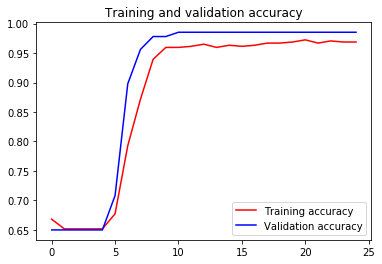

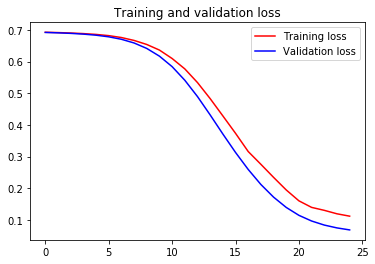

In [12]:
# Train 
h = model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
validation_data=(X_val, Y_val))



dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


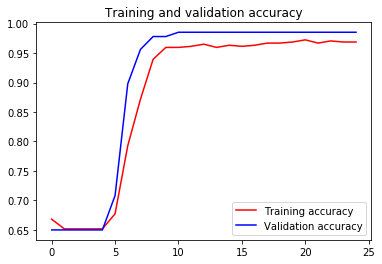

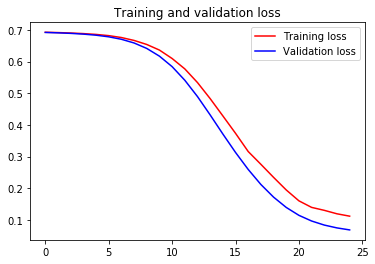

In [21]:
# Plot Graphs
print(h.history.keys())
accuracy = h.history['acc']
val_accuracy = h.history['val_acc']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [14]:
# Evaluate Accuracy
score = model.evaluate(X_val, Y_val, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

137/137 [==============================] - 0s 47us/step
Test loss: 0.0684945246163946
Test accuracy: 0.9854014598540146


In [15]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')





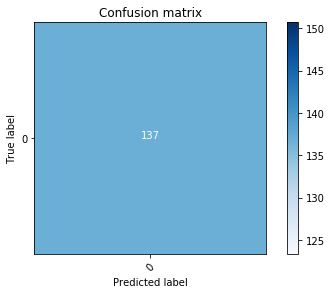

In [19]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(1))

In [20]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = testImages[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
    
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

ValueError: Shape of passed values is (137, 137), indices imply (1, 137)